<h1 style='text-align: center;'> qPCR vs. Tittering Plaque Assay Analysis </h1> 

<p> The goal of this code is to analyze and clean the qPCR and tittering plaque assay data that I have gathered to make conclusions about the various conditions and treatments used. </p>

#### Packages Used

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#### Data Analysis

In [233]:
class Data:
    def __init__(self, df):
        self.sample_info = df.to_dict('list')
        # relevant keys:
        # 'Sample'
        # 'Library'
        # 'Expansion Mode'
        # 'Week(s) Post Expansion'
        # 'Week(s) Post Plaque Assay Tittering'
        
        # 'Plaque Assay Titers'
        # 'qPCR Titers'
        # 'Fold Difference w/out DNase'
        # 'qPCR Titers w/ DNase'
        # 'Fold Difference w/ DNase'
        
        # 'Parent Phage'
        # 'Parent Expansion Mode'
        # 'Parent Plaque Assay Titers'
        # 'Parent qPCR Assay Titers'
        # 'Parent Fold Difference w/out DNase'
        # 'Parent qPCR Titers w/ DNase'
        
        self.graphed_data = {}
        self.displayed_data = {}
    
    # create an empty dictionary containing info for selected samples that will be graphed
    def new_graphing_data(self):
        self.selected_data = {}
        keys = self.sample_info.keys()
        self.selected_data.update({key: [] for key in keys})
        self.selected_data['Note'] = []
    
    # add the sample info to the graphing
    def select_data(self, idx, note=None):
        # acceptable notes: 'None','No DNase', 'DNase', 'pre-PEG', 'post-PEG'
        for key in self.sample_info.keys():
            self.selected_data[key].append(self.sample_info[key][idx])
        self.selected_data['Note'].append(note)
    
    # display the graphing data as a table
    def display_graphed_data(self):
        self.displayed_data = pd.DataFrame(self.graphed_data)
        print(self.displayed_data)
        
    # create dictionary of information that will be displayed
    # if phage sample or DNase treatment, adjust relevant info to display correct info
    def check_graphing_data(self):
        graphing_data = {
            'Sample': [],
            'Library': [],
            'Expansion Mode': [],
            'Note': [],
            'Plaque Assay Titers': [],
            'qPCR Titers': [],
            'Fold Difference': []
        }
        
        for i, note in enumerate(self.selected_data['Note']):
            graphing_data['Note'].append(note)
            graphing_data['Library'].append(self.selected_data['Library'][i])
              
            if note == 'Parent' or note == 'Parent DNase' or note == 'Parent No DNase':
                graphing_data['Sample'].append(self.selected_data['Parent Phage'][i])
                graphing_data['Expansion Mode'].append(self.selected_data['Parent Expansion Mode'][i])
                graphing_data['Plaque Assay Titers'].append(self.selected_data['Parent Plaque Assay Titers'][i])
                
                if note == 'Parent DNase':
                    graphing_data['Note'][-1] = 'DNase'
                    graphing_data['qPCR Titers'].append(self.selected_data['Parent qPCR Titers w/ DNase'][i])
                    graphing_data['Fold Difference'].append(self.selected_data['Parent Fold Difference w/ DNase'][i])

                else:
                    graphing_data['Note'][-1] = 'No DNase'
                    graphing_data['qPCR Titers'].append(self.selected_data['Parent qPCR Titers'][i])
                    graphing_data['Fold Difference'].append(self.selected_data['Parent Fold Difference w/out DNase'][i])
                    
                    if note == 'Parent No DNase':
                        graphing_data['Note'][-1] = 'No DNase'
                    
                    else:
                        graphing_data['Note'][-1] = 'None'
            else:
                graphing_data['Sample'].append(self.selected_data['Sample'][i])
                graphing_data['Expansion Mode'].append(self.selected_data['Expansion Mode'][i])
                graphing_data['Plaque Assay Titers'].append(self.selected_data['Plaque Assay Titers'][i])
                
                if note == 'DNase':
                    graphing_data['qPCR Titers'].append(self.selected_data['qPCR Titers w/ DNase'][i])
                    graphing_data['Fold Difference'].append(self.selected_data['Fold Difference w/ DNase'][i])
                else:
                    graphing_data['qPCR Titers'].append(self.selected_data['qPCR Titers'][i])
                    graphing_data['Fold Difference'].append(self.selected_data['Fold Difference w/out DNase'][i])
        
        self.graphed_data = graphing_data
        self.display_graphed_data()
                
    def generate_legend(self, comparison_type):
        colors = ['red', 'purple', 'blue', 'green']
        color_idx = 0
        legend = {}
        
        if comparison_type == 'Library':
            for library in self.selected_data['Library']:
                if library not in legend:
                    legend[library] = colors[color_idx]
                    color_idx = color_idx + 1
                    
        if comparison_type == 'Expansion Mode':
            legend = {
                'Solid': 'green',
                'Liquid': 'blue'
            }
        
        if comparison_type == 'DNase':
            legend = {
                'DNase': 'green',
                'No DNase': 'blue'
            }
            
        if comparison_type == 'PEG':
            legend = {
                'pre-PEG': 'green',
                'post-PEG': 'blue'
            }
        
        return legend
    
    # graph the selected sample data
    def graph_data(self, comparison_type):
        # Set the xticks and their labels
        xticks = [0, 1]
        xtick_labels = ['qPCR', 'Plaque Assay']
        plt.xticks(xticks, xtick_labels)
        plt.xlabel('Comparison of Titers')
        
        qpcr_titers = self.graphed_data['qPCR Titers']
        plaque_titers = self.graphed_data['Plaque Assay Titers']
        
        legend = self.generate_legend(comparison_type)
        
        for i in range(len(plaque_titers)):
            
            if comparison_type == 'DNase' or comparison_type == 'PEG':
                condition = self.graphed_data['Note'][i]
            else:
                condition = self.graphed_data[comparison_type][i]
                
            plt.scatter(0, qpcr_titers[i], color=legend[condition])
            plt.scatter(1, plaque_titers[i], color=legend[condition])
            plt.plot([0, 1], [qpcr_titers[i], plaque_titers[i]], color=legend[condition])
        
        # create patch colors for legend
        handles = []
        for key in legend.keys():
            patch = mpatches.Patch(color=legend[key], label=key)
            handles.append(patch)
        
        # Add legend and label y-axis
        plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.4, 0.5))
        plt.ylabel('Expanded Titers (PFU/mL)')
    
    def remove_samples(self, idxs, comparison_type):
        for idx in idxs:
            for key in self.graphed_data.keys():
                self.graphed_data[key].pop(idx)
    
        self.display_graphed_data()
        self.graph_data(comparison_type)
    
    # select and graph the data of interest for titer comparison
    # if expansion mode is specified, select only data of that expansion type, then graph
    def compare_week_post_expansion(self, week_of_interest, expansion_mode=None):
        self.new_graphing_data()
        
        for i, week in enumerate(self.sample_info['Week(s) Post Expansion']):
            #weeks_post_plaque_titer = self.sample_info['Week(s) Post Plaque Assay Tittering'][i]
            if expansion_mode is None:
                if week == week_of_interest: #and weeks_post_plaque_titer == 0:
                    self.select_data(i)
            else: 
                if week == week_of_interest: #and weeks_post_plaque_titer == 0:
                    if self.sample_info['Expansion Mode'][i] == expansion_mode: 
                        self.select_data(i)

        self.check_graphing_data()
        self.graph_data(comparison_type='Library')
        
    def compare_expansion_mode(self, solid_only=False):
        self.new_graphing_data()
        for i, expansion_mode in enumerate(self.sample_info['Expansion Mode']):
            parent_expansion_mode = self.sample_info['Parent Expansion Mode'][i]
            if solid_only:
                if expansion_mode == 'Solid':
                    self.select_data(i)
                
                if parent_expansion_mode == 'Solid':
                    self.select_data(i, note='Parent')
            else:
                if expansion_mode == 'Liquid':
                    self.select_data(i)
            
                if parent_expansion_mode == 'Liquid':
                    self.select_data(i, note='Parent')
        
        self.check_graphing_data()
        self.graph_data(comparison_type='Expansion Mode')
        
    def compare_DNase_treatment(self, DNase_only=False, both_treatments=False):
        self.new_graphing_data()
        for i, DNase_qPCR_titer in enumerate(self.sample_info['qPCR Titers w/ DNase']):
            parent_DNase_qPCR_titer = self.sample_info['Parent qPCR Titers w/ DNase'][i]
            if not np.isnan(DNase_qPCR_titer) or not np.isnan(parent_DNase_qPCR_titer):
                if np.isnan(parent_DNase_qPCR_titer):
                    if DNase_only:
                        self.select_data(i, 'DNase')
                    else:
                        self.select_data(i, 'No DNase')
                        if both_treatments:
                            self.select_data(i, 'DNase')
                else:
                    if DNase_only:
                        self.select_data(i, 'DNase')
                        self.select_data(i, 'Parent DNase')
                    else:
                        self.select_data(i, 'No DNase')
                        self.select_data(i, 'Parent No DNase')
                        
                        if both_treatments:
                            self.select_data(i, 'DNase')
                            self.select_data(i, 'Parent DNase')
                    
        self.check_graphing_data()
        self.graph_data(comparison_type='DNase')
        
    def compare_PEG_treatment(self):
        self.new_graphing_data()
        for i, sample_name in enumerate(self.sample_info['Sample']):
            if 'pre-PEG' in sample_name:
                self.select_data(i, 'pre-PEG')
                self.select_data(i+1, 'post-PEG')
           
        self.check_graphing_data()
        self.graph_data(comparison_type='PEG')
        
    def report_fold_differences(self):
        return self.displayed_data['Fold Difference']

In [230]:
def compare_fold_differences(condition, condition1, condition1_label, condition2, condition2_label):

    # Calculate mean and standard deviation of fold differences
    condition1_mean = condition1.mean()
    condition1_std = condition1.std()

    condition2_mean = condition2.mean()
    condition2_std = condition2.std()
    
    # Create bar chart with error bars
    fig, ax = plt.subplots()
    ax.bar([condition1_label, condition2_label], [condition1_mean, condition2_mean], yerr=[condition1_std, condition2_std], capsize=10, color=['blue', 'green'])
    
    # plot the individual data points inside each bar
    x1 = np.random.normal(0, 0.1, len(condition1)) # adding jitter to the x-axis for better visualization
    x2 = np.random.normal(1, 0.1, len(condition2))
    ax.scatter(x1, condition1, color='k', alpha=0.5)
    ax.scatter(x2, condition2, color='k', alpha=0.5)
    
    # add labels
    ax.set_ylabel('Fold Difference')
    ax.set_title(condition)
    plt.show()

#### Data File

In [234]:
# read the .XLSX file
df = pd.read_excel('qPCR vs. Plaque Assay Titers (updated).xlsx', sheet_name='Sheet1')
data = Data(df)

<h2 style='text-align: center;'> Comparing Titers Over Time: </h2>

#### Comparing Week 0 Titers

           Sample       Library Expansion Mode  Note  Plaque Assay Titers  \
0           PH146        Virome         Liquid  None         2.160000e+11   
1           PH148    Sars-CoV-2         Liquid  None         3.080000e+11   
2           PH149  Human pep v1         Liquid  None         1.460000e+11   
3           PH155  Human pep v1         Liquid  None         2.285000e+11   
4           PH156  Human pep v2         Liquid  None         3.400000e+11   
5           PH157  Human pep v2         Liquid  None         2.180000e+11   
6           PH158  Human pep v2         Liquid  None         2.365000e+11   
7           PH166  Human pep v1         Liquid  None         1.900000e+11   
8           PH167  Human pep v1         Liquid  None         2.480000e+11   
9   PH173 pre-PEG  Human pep v1         Liquid  None         3.750000e+10   
10          PH173  Human pep v1         Liquid  None         2.245000e+11   
11  PH174 pre-PEG  Human pep v1         Liquid  None         9.800000e+09   

Text(0.5, 0, 'Comparison of Week 0 Titers')

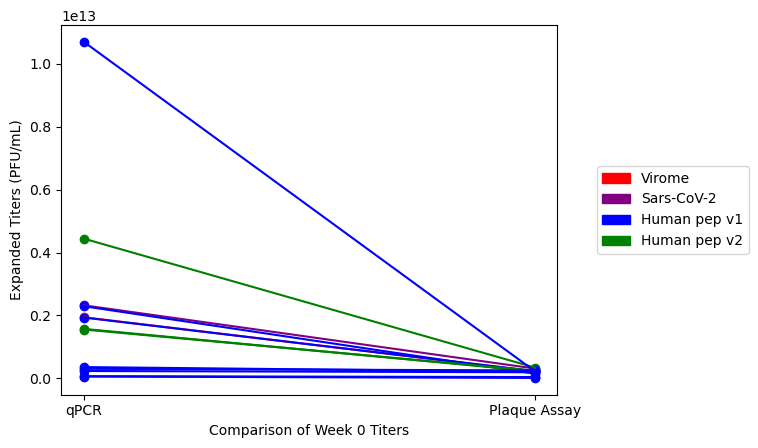

In [235]:
data.compare_week_post_expansion(0, expansion_mode='Liquid')
plt.xlabel('Comparison of Week 0 Titers')

          Sample       Library Expansion Mode  Note  Plaque Assay Titers  \
0          PH146        Virome         Liquid  None         2.160000e+11   
1          PH148    Sars-CoV-2         Liquid  None         3.080000e+11   
2          PH149  Human pep v1         Liquid  None         1.460000e+11   
3          PH155  Human pep v1         Liquid  None         2.285000e+11   
4          PH156  Human pep v2         Liquid  None         3.400000e+11   
5          PH157  Human pep v2         Liquid  None         2.180000e+11   
6          PH158  Human pep v2         Liquid  None         2.365000e+11   
7          PH166  Human pep v1         Liquid  None         1.900000e+11   
8  PH173 pre-PEG  Human pep v1         Liquid  None         3.750000e+10   
9          PH174  Human pep v1         Liquid  None         2.080000e+11   

     qPCR Titers  Fold Difference  
0  1940000000000         8.981481  
1  2320000000000         7.532468  
2  2290000000000        15.684932  
3  1930000000000   

Text(0.5, 0, 'Comparison of Week 0 Titers')

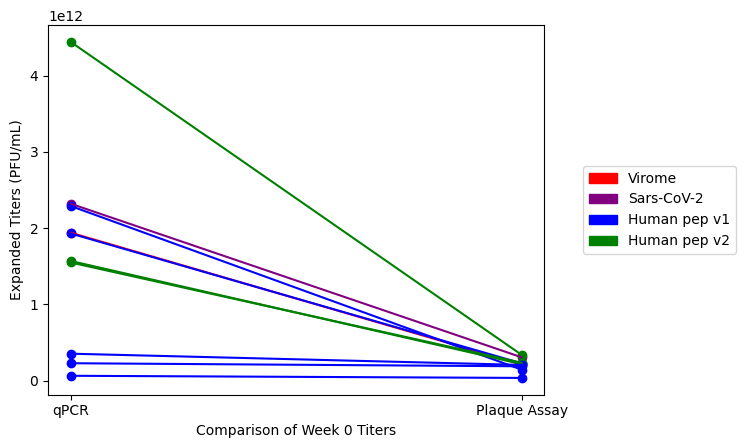

In [236]:
 # remove pre-PEG, Virome, and Sars-CoV-2 samples and samples with ~ 1 fold difference
data.remove_samples(idxs=[11, 10, 8], comparison_type='Library')
plt.xlabel('Comparison of Week 0 Titers') 

In [223]:
# save the fold differences of all data points
week0_comparison = data.report_fold_differences()

#### Comparing Week 1 Titers:

  Sample       Library Expansion Mode  Note  Plaque Assay Titers  \
0  PH142  Human pep v1         Liquid  None         1.370000e+11   
1  PH143  Human pep v1         Liquid  None         1.600000e+11   
2  PH155  Human pep v1         Liquid  None         2.285000e+11   
3  PH156  Human pep v2         Liquid  None         3.400000e+11   
4  PH157  Human pep v2         Liquid  None         2.180000e+11   
5  PH158  Human pep v2         Liquid  None         2.365000e+11   
6  PH166  Human pep v1         Liquid  None         4.655000e+11   
7  PH167  Human pep v1         Liquid  None         2.190000e+11   

     qPCR Titers  Fold Difference  
0   325000000000         2.372263  
1  1020000000000         6.375000  
2  1370000000000         5.995624  
3  3210000000000         9.441176  
4  1040000000000         4.770642  
5   294000000000         1.243129  
6   289000000000         0.620838  
7   331000000000         1.511416  


Text(0.5, 0, 'Comparison of Week 1 Titers')

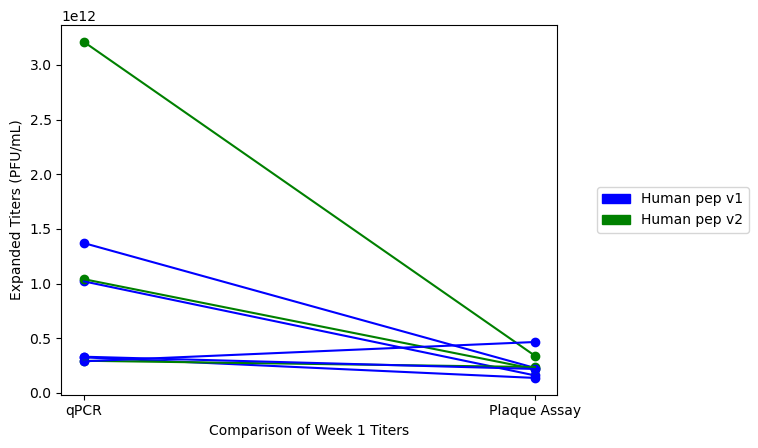

In [224]:
data.compare_week_post_expansion(1, expansion_mode='Liquid')
plt.xlabel('Comparison of Week 1 Titers')

  Sample       Library Expansion Mode  Note  Plaque Assay Titers  \
0  PH142  Human pep v1         Liquid  None         1.370000e+11   
1  PH143  Human pep v1         Liquid  None         1.600000e+11   
2  PH155  Human pep v1         Liquid  None         2.285000e+11   
3  PH156  Human pep v2         Liquid  None         3.400000e+11   
4  PH157  Human pep v2         Liquid  None         2.180000e+11   
5  PH158  Human pep v2         Liquid  None         2.365000e+11   
6  PH167  Human pep v1         Liquid  None         2.190000e+11   

     qPCR Titers  Fold Difference  
0   325000000000         2.372263  
1  1020000000000         6.375000  
2  1370000000000         5.995624  
3  3210000000000         9.441176  
4  1040000000000         4.770642  
5   294000000000         1.243129  
6   331000000000         1.511416  


Text(0.5, 0, 'Comparison of Week 1 Titers')

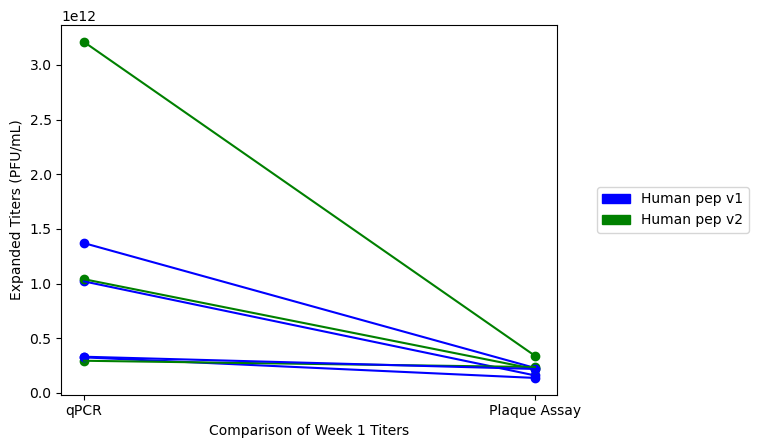

In [225]:
data.remove_samples(idxs=[6], comparison_type='Library')
plt.xlabel('Comparison of Week 1 Titers')

In [226]:
# save the fold differences of all data points
week1_comparison = data.report_fold_differences()

#### Comparing Fold Differences Between Weeks

In [228]:
# find the average fold difference of the data in the week 0 graph
avg_week0_fold_diff = week0_comparison.mean()
print(avg_week0_fold_diff)

7.2126430032740725


In [219]:
# find the average fold difference of the data in the week 1 graph
avg_week1_fold_diff = week1_comparison.mean()
print(avg_week1_fold_diff)

4.5298927953863135


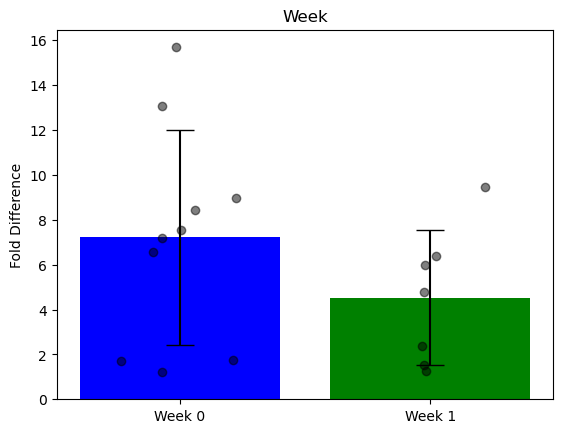

In [232]:
# make a bar graph comparing the fold differences between the two weeks
compare_fold_differences('Week', week0_comparison, 'Week 0', week1_comparison, 'Week 1')

#### Comparing Week 2 Titers:

  Sample       Library Expansion Mode  Note  Plaque Assay Titers  \
0  PH143  Human pep v1         Liquid  None         1.600000e+11   
1  PH156  Human pep v2         Liquid  None         2.030000e+11   
2  PH157  Human pep v2         Liquid  None         1.480000e+11   
3  PH158  Human pep v2         Liquid  None         1.790000e+11   
4  PH166  Human pep v1         Liquid  None                  NaN   
5  PH167  Human pep v1         Liquid  None                  NaN   

     qPCR Titers  Fold Difference  
0  2250000000000        14.062500  
1   315000000000         1.551724  
2    91000000000         0.614865  
3    68500000000         0.382682  
4  1010000000000              NaN  
5  1160000000000              NaN  


Text(0.5, 0, 'Comparison of Week 2 Titers')

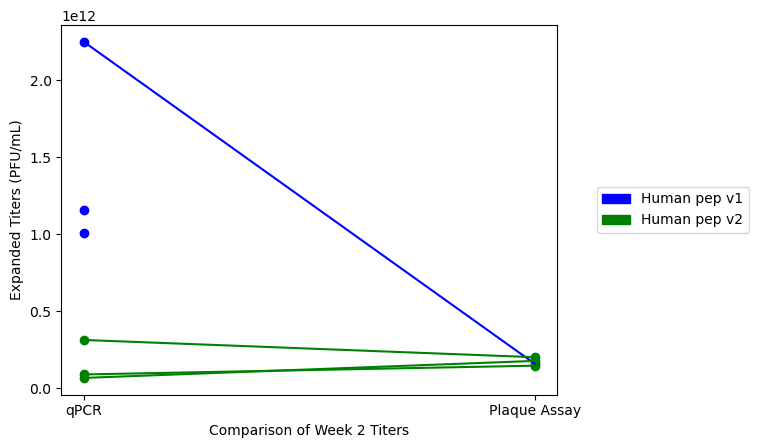

In [13]:
data.compare_week_post_expansion(2, expansion_mode='Liquid')
plt.xlabel('Comparison of Week 2 Titers')

  Sample       Library Expansion Mode  Note  Plaque Assay Titers  \
0  PH156  Human pep v2         Liquid  None         2.030000e+11   
1  PH157  Human pep v2         Liquid  None         1.480000e+11   
2  PH158  Human pep v2         Liquid  None         1.790000e+11   

    qPCR Titers  Fold Difference  
0  315000000000         1.551724  
1   91000000000         0.614865  
2   68500000000         0.382682  


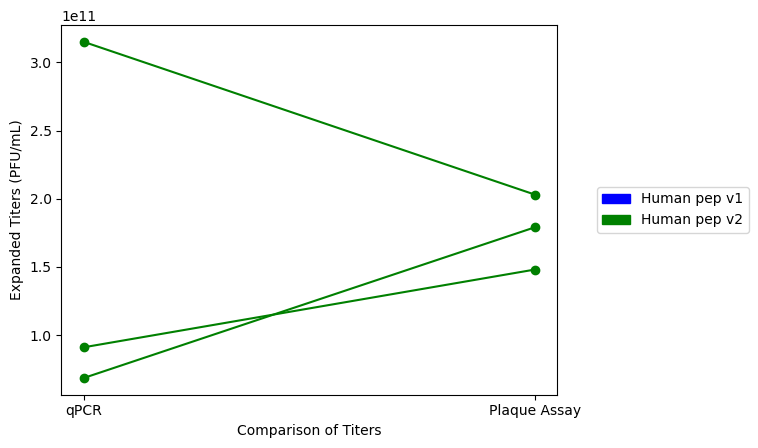

In [14]:
data.remove_samples(idxs=[5,4], comparison_type='Library')

<h2 style='text-align: center;'> Solid vs. Liquid Expansion: </h2>

#### Liquid Only

           Sample       Library Expansion Mode  Note  Plaque Assay Titers  \
0           PH142  Human pep v1         Liquid  None         1.370000e+11   
1           PH143  Human pep v1         Liquid  None         1.600000e+11   
2           PH143  Human pep v1         Liquid  None         1.600000e+11   
3           PH143  Human pep v1         Liquid  None         1.050000e+11   
4           PH143  Human pep v1         Liquid  None         1.170000e+11   
5           PH146        Virome         Liquid  None         2.160000e+11   
6           PH148    Sars-CoV-2         Liquid  None         3.080000e+11   
7           PH149  Human pep v1         Liquid  None         1.460000e+11   
8           PH155  Human pep v1         Liquid  None         2.285000e+11   
9           PH155  Human pep v1         Liquid  None         2.285000e+11   
10          PH156  Human pep v2         Liquid  None         3.400000e+11   
11          PH156  Human pep v2         Liquid  None         3.400000e+11   

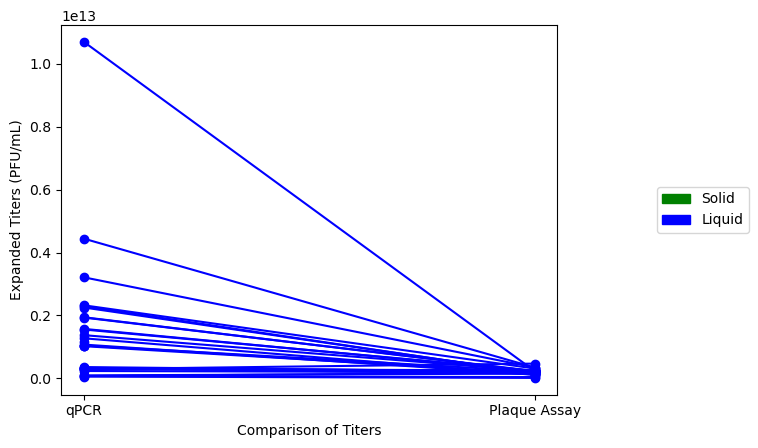

In [202]:
# compare titers for all liquid expanded phage titers
data = Data(df)
data.compare_expansion_mode()

           Sample       Library Expansion Mode  Note  Plaque Assay Titers  \
0           PH142  Human pep v1         Liquid  None         1.370000e+11   
1           PH143  Human pep v1         Liquid  None         1.600000e+11   
2           PH143  Human pep v1         Liquid  None         1.600000e+11   
3           PH143  Human pep v1         Liquid  None         1.050000e+11   
4           PH143  Human pep v1         Liquid  None         1.170000e+11   
5           PH146        Virome         Liquid  None         2.160000e+11   
6           PH148    Sars-CoV-2         Liquid  None         3.080000e+11   
7           PH149  Human pep v1         Liquid  None         1.460000e+11   
8           PH155  Human pep v1         Liquid  None         2.285000e+11   
9           PH155  Human pep v1         Liquid  None         2.285000e+11   
10          PH156  Human pep v2         Liquid  None         3.400000e+11   
11          PH156  Human pep v2         Liquid  None         3.400000e+11   

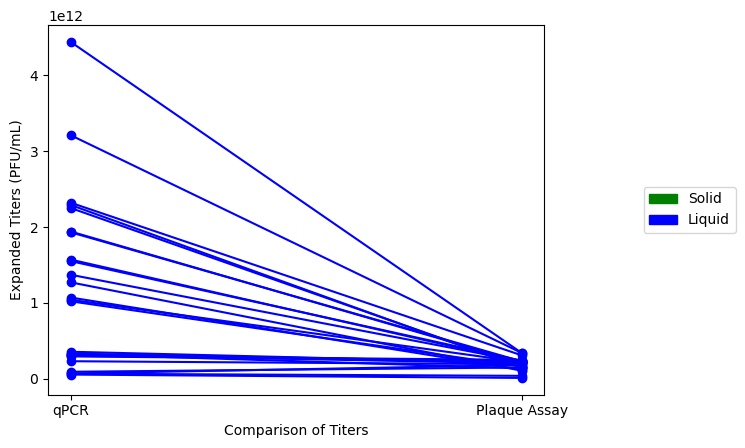

In [203]:
# data cleaning
data.remove_samples(idxs=[26, 24, 21, 20], comparison_type='Expansion Mode')

In [204]:
# save the fold differences of all data points
liquid_comparison = data.report_fold_differences()

#### Solid Only

   Sample          Library Expansion Mode  Note  Plaque Assay Titers  \
0   PH144  Control epitope          Solid  None         3.550000e+10   
1   PH069  Control epitope          Solid  None         5.000000e+10   
2   PH145       Sars-CoV-2          Solid  None         2.320000e+11   
3   PH134       Sars-CoV-2          Solid  None                  NaN   
4   PH145       Sars-CoV-2          Solid  None         3.350000e+10   
5   PH134       Sars-CoV-2          Solid  None                  NaN   
6   PH042           Virome          Solid  None         3.750000e+10   
7   PH134       Sars-CoV-2          Solid  None                  NaN   
8   PH150  Control epitope          Solid  None         5.100000e+10   
9   PH071  Control epitope          Solid  None         3.050000e+10   
10  PH151  Control epitope          Solid  None         1.450000e+10   
11  PH072  Control epitope          Solid  None         8.100000e+09   
12  PH152  Control epitope          Solid  None         4.400000

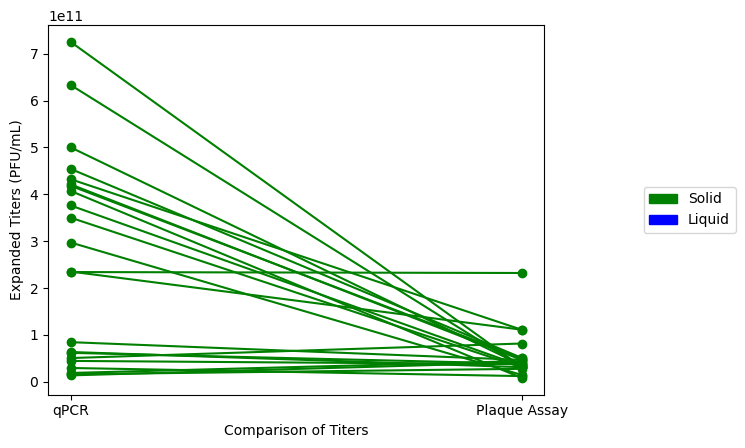

In [205]:
data = Data(df)
data.compare_expansion_mode(solid_only=True)

   Sample          Library Expansion Mode  Note  Plaque Assay Titers  \
0   PH144  Control epitope          Solid  None         3.550000e+10   
1   PH069  Control epitope          Solid  None         5.000000e+10   
2   PH145       Sars-CoV-2          Solid  None         3.350000e+10   
3   PH042           Virome          Solid  None         3.750000e+10   
4   PH150  Control epitope          Solid  None         5.100000e+10   
5   PH071  Control epitope          Solid  None         3.050000e+10   
6   PH151  Control epitope          Solid  None         1.450000e+10   
7   PH152  Control epitope          Solid  None         4.400000e+10   
8   PH073  Control epitope          Solid  None         1.200000e+10   
9   PH153  Control epitope          Solid  None         2.750000e+10   
10  PH138  Control epitope          Solid  None         4.100000e+10   
11  PH147     Human pep v2          Solid  None         3.170000e+10   
12  PH147     Human pep v2          Solid  None         3.170000

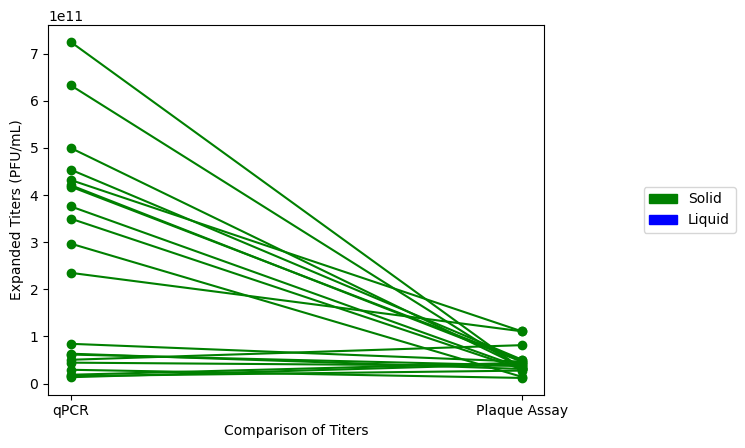

In [206]:
data.remove_samples(idxs=[11, 7, 5, 3, 2], comparison_type='Expansion Mode')

In [207]:
# save the fold differences of all data points
solid_comparison = data.report_fold_differences()

#### Comparing Fold Differences Between Expansion Modes

In [208]:
# find the average fold difference of the data in the liquid expanded graph
avg_liq_fold_diff = liquid_comparison.mean()
print(avg_liq_fold_diff)

5.935498429829844


In [209]:
# find the average fold difference of the data in the solid expanded graph
avg_sol_fold_diff = solid_comparison.mean()
print(avg_sol_fold_diff)

7.172252307025777


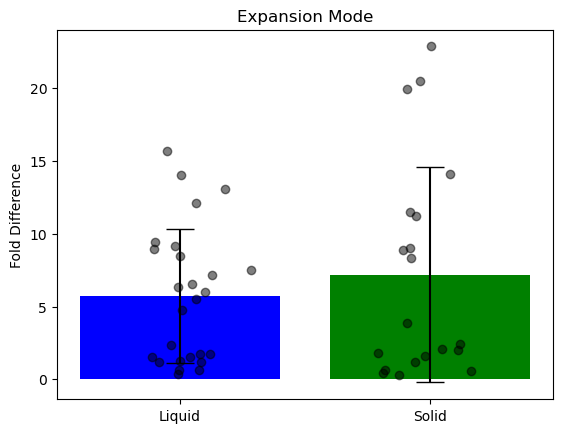

In [119]:
# make a bar graph comparing the fold differences between the two conditions
compare_fold_differences('Expansion Mode', liquid_comparison, 'Liquid', solid_comparison, 'Solid')

<h2 style='text-align: center;'> DNase Treatment: </h2>

#### Both No DNase and DNase Treatment

           Sample       Library Expansion Mode      Note  Plaque Assay Titers  \
0           PH155  Human pep v1         Liquid  No DNase         2.285000e+11   
1           PH002  Human pep v1            NaN  No DNase         1.200000e+10   
2           PH155  Human pep v1         Liquid     DNase         2.285000e+11   
3           PH002  Human pep v1            NaN     DNase         1.200000e+10   
4           PH156  Human pep v2         Liquid  No DNase         3.400000e+11   
5           PH147  Human pep v2          Solid  No DNase         3.170000e+10   
6           PH156  Human pep v2         Liquid     DNase         3.400000e+11   
7           PH147  Human pep v2          Solid     DNase         3.170000e+10   
8           PH156  Human pep v2         Liquid  No DNase         2.030000e+11   
9           PH147  Human pep v2          Solid  No DNase         3.100000e+10   
10          PH156  Human pep v2         Liquid     DNase         2.030000e+11   
11          PH147  Human pep

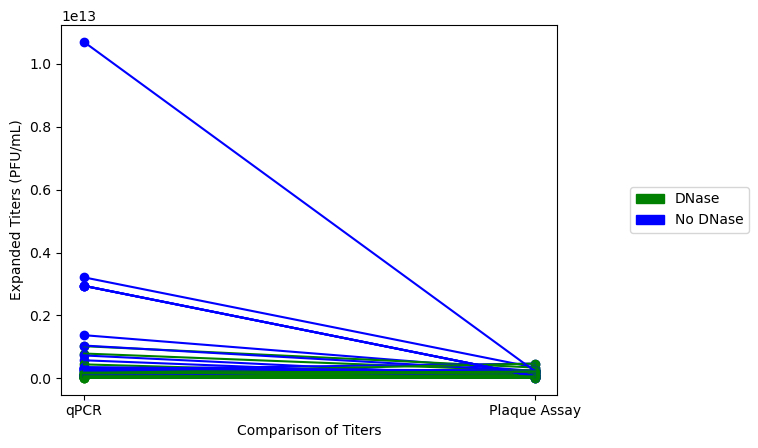

In [199]:
data = Data(df)
data.compare_DNase_treatment(DNase_only=False, both_treatments=True)

   Sample       Library Expansion Mode      Note  Plaque Assay Titers  \
0   PH155  Human pep v1         Liquid  No DNase         2.285000e+11   
1   PH002  Human pep v1            NaN  No DNase         1.200000e+10   
2   PH155  Human pep v1         Liquid     DNase         2.285000e+11   
3   PH002  Human pep v1            NaN     DNase         1.200000e+10   
4   PH156  Human pep v2         Liquid  No DNase         3.400000e+11   
5   PH147  Human pep v2          Solid  No DNase         3.170000e+10   
6   PH156  Human pep v2         Liquid     DNase         3.400000e+11   
7   PH156  Human pep v2         Liquid  No DNase         2.030000e+11   
8   PH147  Human pep v2          Solid  No DNase         3.100000e+10   
9   PH156  Human pep v2         Liquid     DNase         2.030000e+11   
10  PH147  Human pep v2          Solid     DNase         3.100000e+10   
11  PH157  Human pep v2         Liquid  No DNase         2.180000e+11   
12  PH064  Human pep v2          Solid  No DNase   

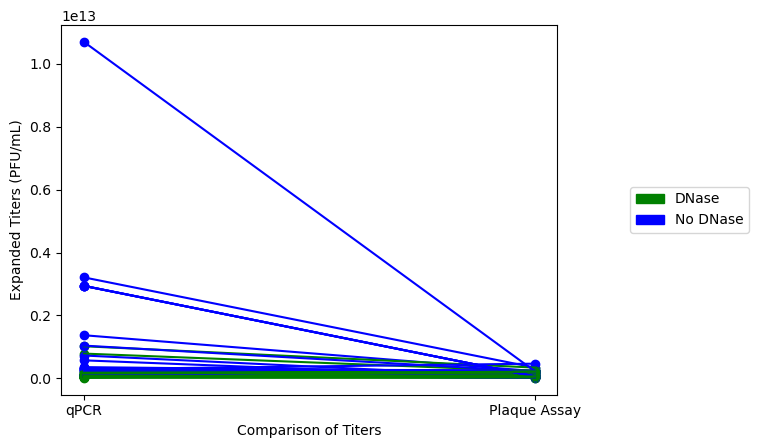

In [200]:
data.remove_samples(idxs=[54, 52, 46, 44, 34, 7], comparison_type='DNase')

#### No DNase Treatment Only

           Sample       Library Expansion Mode      Note  Plaque Assay Titers  \
0           PH155  Human pep v1         Liquid  No DNase         2.285000e+11   
1           PH002  Human pep v1            NaN  No DNase         1.200000e+10   
2           PH156  Human pep v2         Liquid  No DNase         3.400000e+11   
3           PH147  Human pep v2          Solid  No DNase         3.170000e+10   
4           PH156  Human pep v2         Liquid  No DNase         2.030000e+11   
5           PH147  Human pep v2          Solid  No DNase         3.100000e+10   
6           PH157  Human pep v2         Liquid  No DNase         2.180000e+11   
7           PH064  Human pep v2          Solid  No DNase         1.110000e+11   
8           PH157  Human pep v2         Liquid  No DNase         1.480000e+11   
9           PH064  Human pep v2          Solid  No DNase         8.150000e+10   
10          PH158  Human pep v2         Liquid  No DNase         2.365000e+11   
11          PH136  Human pep

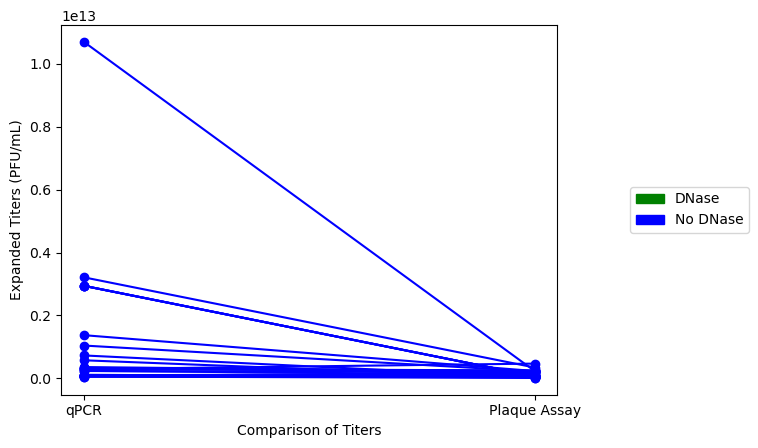

In [185]:
data.compare_DNase_treatment(DNase_only=False, both_treatments=False)

   Sample       Library Expansion Mode      Note  Plaque Assay Titers  \
0   PH155  Human pep v1         Liquid  No DNase         2.285000e+11   
1   PH002  Human pep v1            NaN  No DNase         1.200000e+10   
2   PH156  Human pep v2         Liquid  No DNase         3.400000e+11   
3   PH147  Human pep v2          Solid  No DNase         3.170000e+10   
4   PH156  Human pep v2         Liquid  No DNase         2.030000e+11   
5   PH147  Human pep v2          Solid  No DNase         3.100000e+10   
6   PH157  Human pep v2         Liquid  No DNase         2.180000e+11   
7   PH064  Human pep v2          Solid  No DNase         1.110000e+11   
8   PH157  Human pep v2         Liquid  No DNase         1.480000e+11   
9   PH064  Human pep v2          Solid  No DNase         8.150000e+10   
10  PH158  Human pep v2         Liquid  No DNase         2.365000e+11   
11  PH136  Human pep v2          Solid  No DNase         4.660000e+10   
12  PH158  Human pep v2         Liquid  No DNase   

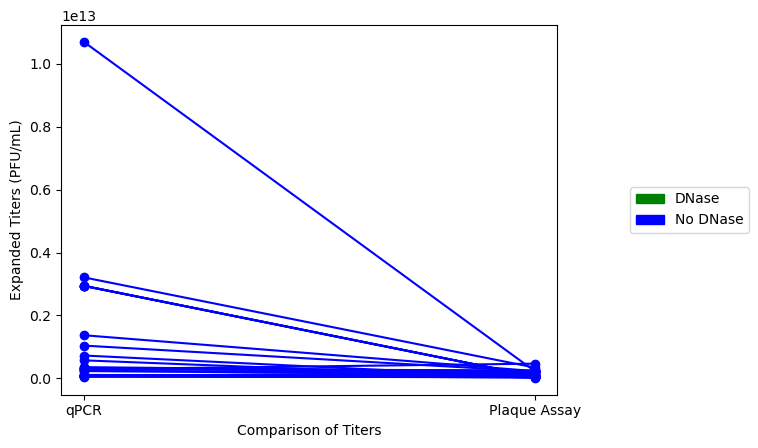

In [186]:
data.remove_samples(idxs=[26, 22], comparison_type='DNase')

In [187]:
# save the fold differences of all data points
no_DNase_comparison = data.report_fold_differences()

#### DNase Only

           Sample       Library Expansion Mode   Note  Plaque Assay Titers  \
0           PH155  Human pep v1         Liquid  DNase         2.285000e+11   
1           PH002  Human pep v1            NaN  DNase         1.200000e+10   
2           PH156  Human pep v2         Liquid  DNase         3.400000e+11   
3           PH147  Human pep v2          Solid  DNase         3.170000e+10   
4           PH156  Human pep v2         Liquid  DNase         2.030000e+11   
5           PH147  Human pep v2          Solid  DNase         3.100000e+10   
6           PH157  Human pep v2         Liquid  DNase         2.180000e+11   
7           PH064  Human pep v2          Solid  DNase         1.110000e+11   
8           PH157  Human pep v2         Liquid  DNase         1.480000e+11   
9           PH064  Human pep v2          Solid  DNase         8.150000e+10   
10          PH158  Human pep v2         Liquid  DNase         2.365000e+11   
11          PH136  Human pep v2          Solid  DNase         4.

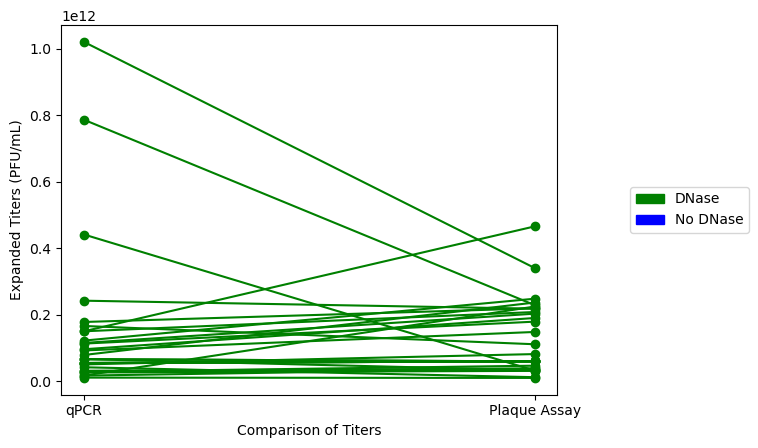

In [167]:
data = Data(df)
data.compare_DNase_treatment(DNase_only=True)

   Sample       Library Expansion Mode   Note  Plaque Assay Titers  \
0   PH155  Human pep v1         Liquid  DNase         2.285000e+11   
1   PH002  Human pep v1            NaN  DNase         1.200000e+10   
2   PH156  Human pep v2         Liquid  DNase         3.400000e+11   
3   PH156  Human pep v2         Liquid  DNase         2.030000e+11   
4   PH147  Human pep v2          Solid  DNase         3.100000e+10   
5   PH157  Human pep v2         Liquid  DNase         2.180000e+11   
6   PH064  Human pep v2          Solid  DNase         1.110000e+11   
7   PH157  Human pep v2         Liquid  DNase         1.480000e+11   
8   PH064  Human pep v2          Solid  DNase         8.150000e+10   
9   PH158  Human pep v2         Liquid  DNase         2.365000e+11   
10  PH136  Human pep v2          Solid  DNase         4.660000e+10   
11  PH158  Human pep v2         Liquid  DNase         1.790000e+11   
12  PH136  Human pep v2          Solid  DNase         3.850000e+10   
13  PH166  Human pep

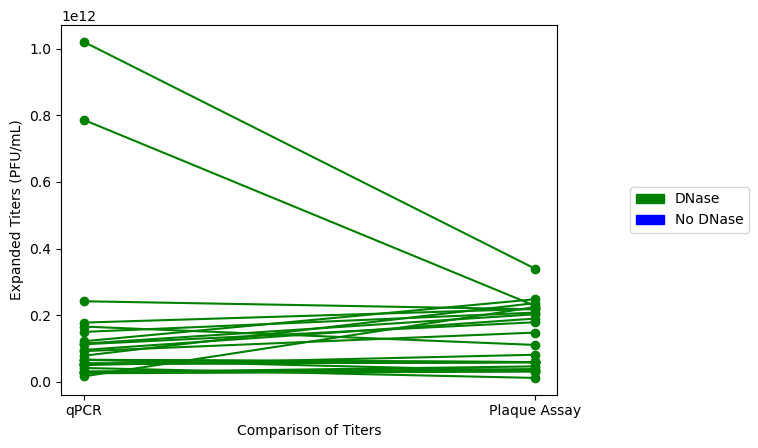

In [168]:
data.remove_samples(idxs=[26, 22, 16, 3], comparison_type='DNase')

In [169]:
# store fold differences
DNase_comparison = data.report_fold_differences()

#### Comparing Fold Differences Between Conditions

In [189]:
# find the average fold difference of the data in the No DNase Treatment graph
avg_no_DNase_fold_diff = no_DNase_comparison.mean()
print(avg_no_DNase_fold_diff)

12.939245023702899


In [190]:
# find the average fold difference of the data in the solid expanded graph
avg_DNase_fold_diff = DNase_comparison.mean()
print(avg_DNase_fold_diff)

1.1156051688455284


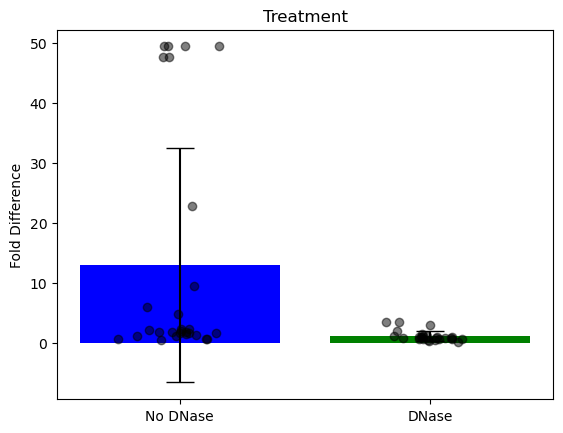

In [196]:
# make a bar graph comparing the fold differences between the two conditions
compare_fold_differences('Treatment', no_DNase_comparison, 'No DNase', DNase_comparison, 'DNase')